In [ ]:
# Import prerequisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Load data as data frame
exports_sa = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)

In [ ]:
exports_sa.head()

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [ ]:
exports_sa.tail()

,ZAR/USD,Value of Exports (ZAR)
2017M08,13.23,103199.17
2017M09,13.16,102150.48
2017M10,13.71,104205.42
2017M11,14.06,116185.99
2017M12,13.25,104320.26


In [ ]:
exports_sa.shape

(120, 2)

Judging from the index column and shape of data frame, we have data from January 2008 to December 2017.

In [ ]:
# Split data into predictor and outcome
X = exports_sa['Value of Exports (ZAR)']
y = exports_sa['ZAR/USD']

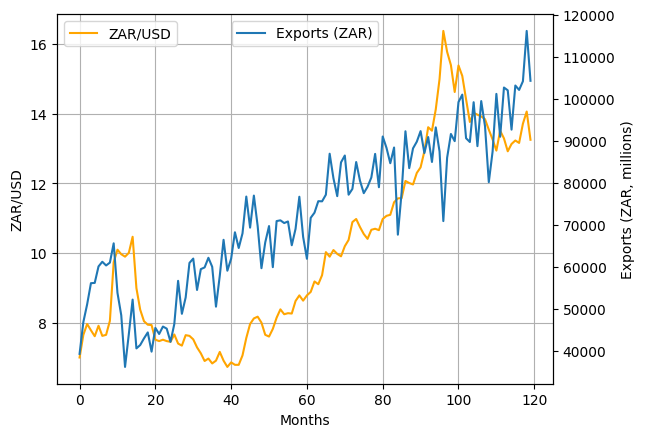

In [ ]:
# Visualise relationship between predictor and outcome
fig = plt.figure() # Create a blank figure object to hold the plots

# Add a subplot to the figure, '111' means 1x1 grid, first subplot
ax1 = fig.add_subplot(111)

# Plot the ZAR/USD exchange rate data on the primary y-axis using an orange line
ax1.plot(np.arange(len(y)), y, '-', label = 'ZAR/USD', color='orange')

# Create a second y-axis (twin of the first) to accommodate another data set on the same x-axis
ax2 = ax1.twinx()

# Plot the Value of Exports data on the secondary y-axis
ax2.plot(np.arange(len(X)), X, '-', label = 'Exports (ZAR)')

# Add legends to distinguish the two lines, with custom locations for clarity
ax1.legend(loc=2)  # Legend for the primary axis (ZAR/USD) at the top left (location 2)
ax2.legend(loc=9)  # Legend for the secondary axis (Exports) at the top centre (location 9)

ax1.grid() # Enable grid for better readability of the plot

# Set the labels for the x-axis and both y-axes to indicate the data being plotted
ax1.set_xlabel("Months")
ax1.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")

plt.show() # Display the plot

The value of exports and exchange rate have tended to increase over time.

However, we are not interested in the variation with time per se, rather, the relationship between exports value and exchange rate.

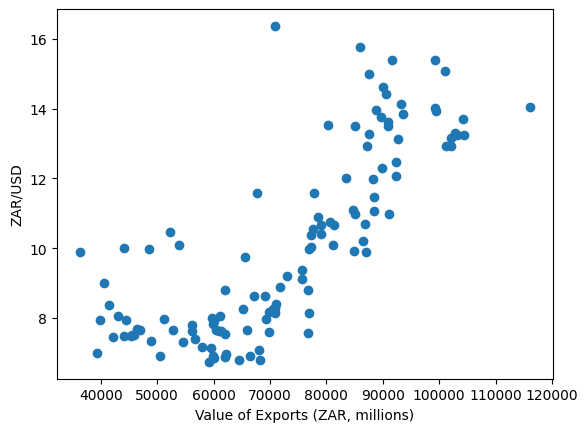

In [ ]:
# Plot a scatter graph for exchange rate vs exports value
plt.scatter(X, y)
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

In [ ]:
exports_exchange_lm = LinearRegression() # Initialise linear regression model
exports_exchange_lm.fit(X.values.reshape(-1, 1), y) # Train the model

LinearRegression()

Note: the fit method requires the predictor to be a 2-dimensional NumPy array yet X is 1-dimensional pandas series. So, X has to be modified to make it suitable or the method.

In [ ]:
# Extract the slope/ gradient/ coefficient and intercept from the fitted model
m = exports_exchange_lm.coef_[0]
c = exports_exchange_lm.intercept_

In [ ]:
# Print the gradient and intercept
print("Gradient:\t", m)
print("Intercept:\t", c)

Gradient:	 0.00011350725765884299
Intercept:	 1.844811467042648


In [ ]:
# Use the trained model to generate y_hat values from the X values
y_hat = exports_exchange_lm.predict(X.values.reshape(-1, 1))

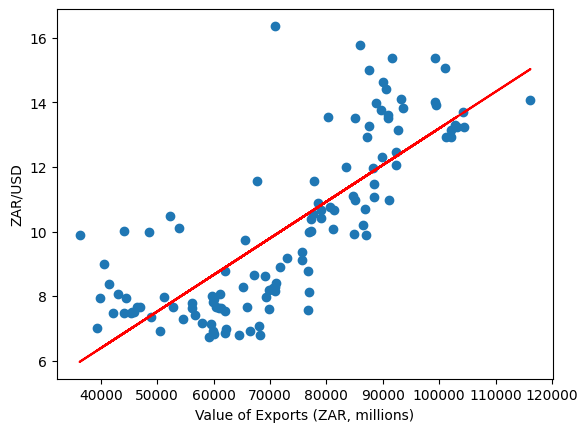

In [ ]:
# plot the results
plt.scatter(X, y)  # Plot the original data
plt.plot(X, y_hat, color='red')  # Plot the line connecting the generated y-values

# Label the axes
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")

plt.show()

In [ ]:
# Measure model accuracy
print('MSE:', metrics.mean_squared_error(y, y_hat))
print('RSS:', metrics.mean_squared_error(y, y_hat)*len(y))
print('R_Squared:', metrics.r2_score(y, y_hat))

MSE: 2.6788097212714708
RSS: 321.4571665525765
R_Squared: 0.6158417476896207


Measuring model accuracy this way, however, is not particularly helpful because it tells us nothing about how the model will perform on unseen data. If we had more data similar to what we used to train the model, we would use it to measure the model's accuracy (test it). Yet, since we do not have such data, we split the data we do have into training and test sets.

In [ ]:
# Split data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

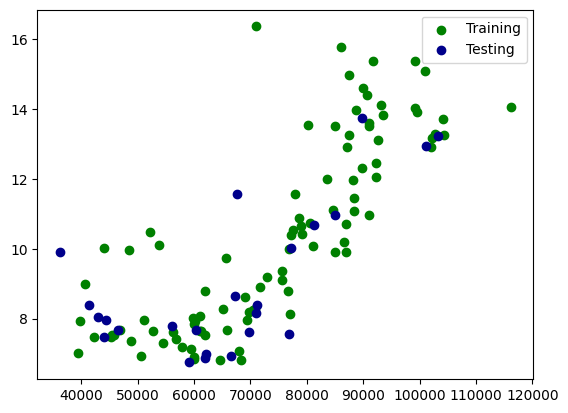

In [ ]:
# Plot the splitting results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

In [ ]:
exports_exchange_lm2 = LinearRegression() # Initialise new linear regression model
exports_exchange_lm2.fit(X_train.values.reshape(-1, 1), y_train) # Train the model on training portion of the data

LinearRegression()

In [ ]:
# Extract the slope/ gradient/ coefficient and intercept from the trained model
m2 = exports_exchange_lm2.coef_[0]
c2 = exports_exchange_lm2.intercept_

In [ ]:
# Print the gradient and intercept
print("Gradient:\t", m2)
print("Intercept:\t", c2)

Gradient:	 0.0001199004032121743
Intercept:	 1.4542630444144802


In [ ]:
# Use the trained model to generate y_hat values from the X values
y_hat2 = exports_exchange_lm2.predict(X_train.values.reshape(-1, 1))

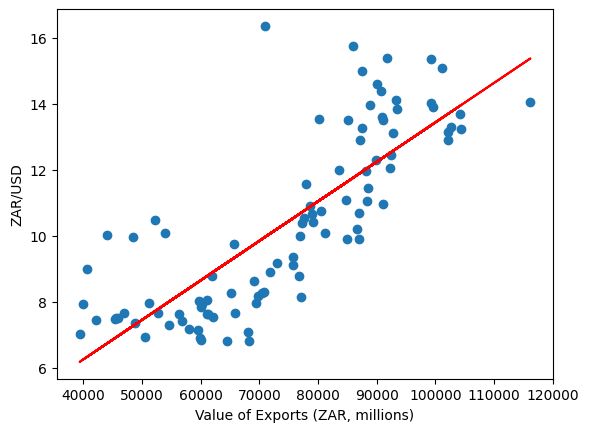

In [ ]:
# plot the results
plt.scatter(X_train, y_train)  # Plot the original data
plt.plot(X_train, y_hat2, color='red')  # Plot the line connecting the generated y-values

# Label the axes
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")

plt.show()

In [ ]:
# Measure model accuracy using training data
print('MSE_train:', metrics.mean_squared_error(y_train, y_hat2))
print('RSS_train:', metrics.mean_squared_error(y_train, y_hat2)*len(y_train))
print('R_Squared_train:', metrics.r2_score(y_train, y_hat2))

MSE_train: 2.6125475375589073
RSS_train: 250.80456360565512
R_Squared_train: 0.6402293095045937


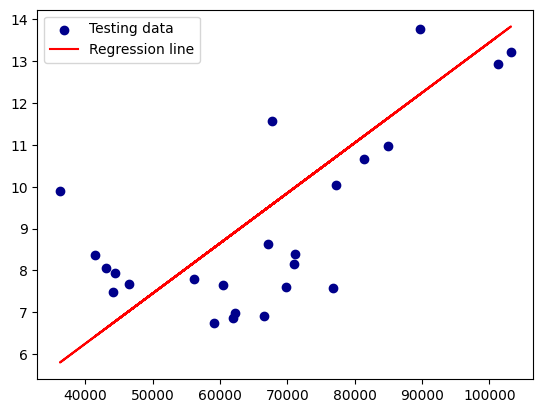

In [ ]:
# Generate values of y from x, using testing data
y_hat_test = exports_exchange_lm2.predict(X_test.values.reshape(-1, 1))

# Plot the results
plt.scatter(X_test, y_test, color='darkblue', label='Testing data')  # Plot the testing data in blue
plt.plot(X_test, y_hat_test, color='red', label='Regression line')  # Plot the line connecting the generated y-values in red
plt.legend()
plt.show()

In [ ]:
# Measure model accuracy using testing data
print('MSE_test:', metrics.mean_squared_error(y_test, y_hat_test))
print('RSS_test:', metrics.mean_squared_error(y_test, y_hat_test)*len(y_test))
print('R_Squared_test:', metrics.r2_score(y_test, y_hat_test))

MSE_test: 3.038981977599916
RSS_test: 72.93556746239798
R_Squared_test: 0.30031043412578884


The RSS is not a good measure for comparing models with different numbers of observations.

MSE and R-squared indicate that the model fits the testing data much worse than the training data. This indicates *overfitting*